# **Importing Libraries & Loading Data**

In [6]:
import numpy as np
import matplotlib.pyplot as plt                        # To visualize
import pandas as pd                                    # To read data
from sklearn.linear_model import LinearRegression

df2 = pd.read_csv('MLR.csv')                           # load data set
df2

,Quantity Demand,Price,Income
0,100.0,5,1000
1,75.0,7,600
2,80.0,6,1200
3,70.0,6,500
4,50.0,8,300
5,65.0,7,400
6,90.0,5,1300
7,100.0,4,1100
8,110.0,3,1300
9,60.0,9,300


**Here, We will be predicting Quantity Demand for Pirce = 6 and Income = 600**

Just for convenience, we have included it in our dataset. But we will train our model with data 0-9 index then predict value of 10th index

# Using Matrix
---
Formula, 

a.png

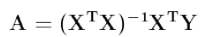

c.png

# Using Matrix

Intercept: 
 [111.6918189]

Slope:
[-7.18824464]
[0.01429706]

Predicted Values:
[ 90.04765687  69.95234313  85.71882446  75.71088165  58.47498014
  67.0929309   94.33677522  98.66560763 108.7132645   51.2867355 ]

R^2: 89.44%

Predicted QD: 77.14



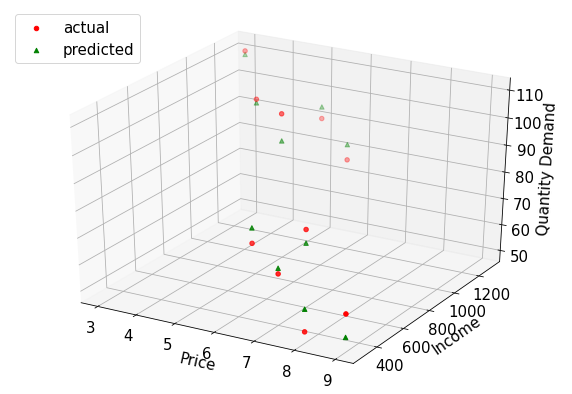

In [7]:
a = np.array(df2.iloc[:, 1:])
b = df2['Quantity Demand']
predictValue1 = np.array(a[-1:]) 
a = a[:-1] 
b = b[:-1]

one = np.ones((len(a),1))
a2 = np.append(one, a, axis=1)
#reshape Y to a column vector
b2 = np.array(b).reshape((len(b),1))

p_mat = np.array(np.linalg.inv(a2.T.dot(a2)).dot(a2.T).dot(b2))

print('Intercept: \n', p_mat[0])
print('\nSlope:')
i = 1
while i < len(p_mat):
 print(p_mat[i])
 i += 1

i = 1
pred = []
for key in a.T:
 tmp = key * p_mat[i]
 pred.append(tmp.T)
 i += 1
 
pred_final =  p_mat[0] + np.sum(pred, axis = 0)
print('\nPredicted Values:')
print(pred_final)

SSE = sum((b - pred_final.T) ** 2)
SST = sum((b - np.mean(b)) ** 2)
RSquared = (1 - (SSE / SST)) * 100 
print('\nR^2: %.2f' %RSquared + '%')

i = 1
pred = []
for key in predictValue1.T:
  tmp = key * p_mat[i]
  pred.append(tmp.T)
  i += 1
predicted_qd = p_mat[0] + np.sum(pred, axis = 0)
print('\nPredicted QD: %.2f\n' % (predicted_qd))

# # # Plot data, regression line
xa, xb = a.T
fig = plt.figure(figsize=(10, 7))
plt.rc('font', size=15) 
ax = fig.gca(projection ='3d')
ax.set_xlabel('Price')
ax.set_ylabel('Income')
ax.set_zlabel('Quantity Demand')
ax.scatter(xa, xb, b, label ='actual',s = 20, color ="red", marker='o')
ax.scatter(xa, xb, pred_final, label ='predicted', s = 20, color ="green", marker='^')
ax.legend(loc='upper left')
plt.show()

# **Multivariable Linear Regression Using Raw Code**

Coefficients: a = 111.692, b1 = -7.188, b2 = 0.014

R^2: 0.894

Predicted QD: 77.14



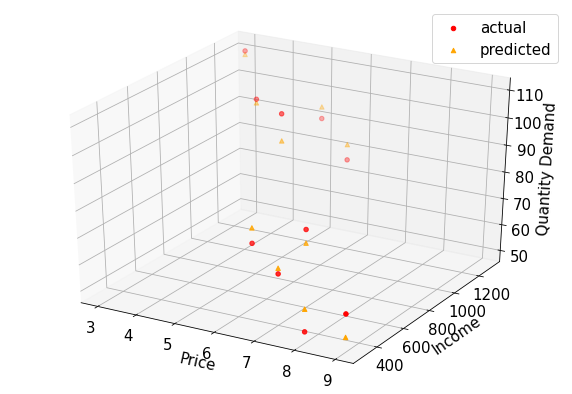

In [8]:
Y = df2['Quantity Demand']
X1 = df2.Price
X2 = df2.Income
predictValue1 = X1[-1:]
predictValue2 = X2[-1:]
X1 = X1[:-1]
X2 = X2[:-1]
Y = Y[:-1]

y = Y - np.mean(Y)
x1 = X1 - np.mean(X1)
x2 = X2 - np.mean(X2)

sumOf_ySquare = sum(y ** 2)
sumOf_x1Square = sum(x1 ** 2)
sumOf_x2Square = sum(x2 ** 2)
sumOf_yx1 = sum(y * x1)
sumOf_yx2 = sum(y * x2)
sumOf_x1x2 = sum(x1 * x2)
sumOf_x1x2Square = sumOf_x1x2 ** 2

b1 = ((sumOf_x2Square * sumOf_yx1) - (sumOf_x1x2 * sumOf_yx2)) / ((sumOf_x2Square * sumOf_x1Square) - sumOf_x1x2Square)
b2 = ((sumOf_x1Square * sumOf_yx2) - (sumOf_x1x2 * sumOf_yx1)) / ((sumOf_x2Square * sumOf_x1Square) - sumOf_x1x2Square)

a = np.mean(Y) - (b1 * np.mean(X1)) - (b2 * np.mean(X2))
print('Coefficients: a = %.3f, b1 = %.3f, b2 = %.3f\n' % (a, b1, b2))
y_hat2 = []
for i in range(len(x1)):
 y_hat2.append(a + (b1 * X1[i]) + (b2 * X2[i]))
SSE = sum((Y - y_hat2) ** 2)
SST = sum((Y - np.mean(Y)) ** 2)
RSquared = 1 - (SSE / SST)
print('R^2: %.3f' %RSquared)

predicted_qd = a + (b1 * predictValue1) + (b2 * predictValue2)
print('\nPredicted QD: %.2f\n' % (predicted_qd))

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection ='3d')
ax.set_xlabel('Price')
ax.set_ylabel('Income')
ax.set_zlabel('Quantity Demand')
ax.scatter(X1, X2, Y, label ='actual',s = 20, color ="red", marker='o')
ax.scatter(X1, X2, y_hat2, label ='predicted', s = 20, color ="orange", marker='^')
ax.legend()
plt.show()